In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import scipy.stats as distribution
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler
from sklearn.impute import MissingIndicator, KNNImputer
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, classification_report, fbeta_score, ConfusionMatrixDisplay, d2_absolute_error_score, precision_recall_fscore_support
from sklearn.inspection import permutation_importance
%precision 2
plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
features = ["radius", "texture", "perimeter", "area", "smothness", "compactness", "concavity", "concave points", "symmetry", "fractal dimension"]
names = np.hstack(list(zip(*[["Mean " + i, "STD " + i, "Worst " + i] for i in features])))
print(["id number", "Diagnosis"] + list(names))

['id number', 'Diagnosis', 'Mean radius', 'Mean texture', 'Mean perimeter', 'Mean area', 'Mean smothness', 'Mean compactness', 'Mean concavity', 'Mean concave points', 'Mean symmetry', 'Mean fractal dimension', 'STD radius', 'STD texture', 'STD perimeter', 'STD area', 'STD smothness', 'STD compactness', 'STD concavity', 'STD concave points', 'STD symmetry', 'STD fractal dimension', 'Worst radius', 'Worst texture', 'Worst perimeter', 'Worst area', 'Worst smothness', 'Worst compactness', 'Worst concavity', 'Worst concave points', 'Worst symmetry', 'Worst fractal dimension']


In [3]:
wisconsinRecurrence = pd.read_csv("../data/wpbc.csv", names=["id number", "Recurrence", "Time"] + list(names) + ["Tumour Size", "Lymph node status"] , na_values=["?"])

In [4]:
wisconsinRecurrence

,id number,Recurrence,Time,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smothness,Mean compactness,Mean concavity,...,Worst perimeter,Worst area,Worst smothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension,Tumour Size,Lymph node status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.0
194,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.0
195,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.0
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,NaN


# wisconsinRecurrence has unique id numbers

In [5]:
len(np.unique(wisconsinRecurrence["id number"])) == len(wisconsinRecurrence["id number"])

True

In [6]:
wisconsinRecurrence = wisconsinRecurrence.set_index("id number")

# Time cannot be known before recurrence

In [7]:
time = wisconsinRecurrence.pop("Time")

# There are 4 NaN values in Lymph node status

In [8]:
wisconsinRecurrence.isna().astype(int).sum()

Recurrence                 0
Mean radius                0
Mean texture               0
Mean perimeter             0
Mean area                  0
Mean smothness             0
Mean compactness           0
Mean concavity             0
Mean concave points        0
Mean symmetry              0
Mean fractal dimension     0
STD radius                 0
STD texture                0
STD perimeter              0
STD area                   0
STD smothness              0
STD compactness            0
STD concavity              0
STD concave points         0
STD symmetry               0
STD fractal dimension      0
Worst radius               0
Worst texture              0
Worst perimeter            0
Worst area                 0
Worst smothness            0
Worst compactness          0
Worst concavity            0
Worst concave points       0
Worst symmetry             0
Worst fractal dimension    0
Tumour Size                0
Lymph node status          4
dtype: int64

# Fill missing values in Lymph node status

## 4 Missing values

In [9]:
wisconsinRecurrence.columns = wisconsinRecurrence.columns.astype(str)

In [10]:
sum(MissingIndicator().fit_transform(wisconsinRecurrence))

array([4])

In [11]:
wisconsinRecurrence["Lymph node status"].values

array([ 5.,  2.,  0.,  0.,  0.,  0., nan, 10.,  1., 20.,  0.,  0.,  0.,
        6.,  0.,  1.,  0.,  1.,  0.,  1.,  0., 13.,  0.,  0.,  2.,  1.,
        0.,  0., nan, 13., 10.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
        0., 13.,  6.,  0.,  1.,  0.,  4.,  2.,  0.,  1.,  0.,  2.,  1.,
        0.,  0.,  4.,  2.,  1., 17.,  0., 15., 11.,  0.,  9.,  0.,  8.,
        1.,  0.,  7.,  2.,  0.,  3.,  1.,  2.,  1.,  1.,  4.,  7.,  1.,
        0.,  3.,  0.,  4.,  9.,  0.,  1., nan, 14.,  0.,  0.,  0.,  1.,
        0.,  2.,  0.,  0.,  1., 27.,  5., 24.,  1.,  0.,  1.,  0.,  7.,
        0., 15.,  0.,  0.,  3.,  1.,  1.,  0.,  6.,  2., 11.,  0.,  0.,
       15.,  0., 18.,  0., 11.,  0.,  1.,  2.,  2.,  0.,  0.,  4., 13.,
        0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  0., 13., 16.,  3., 13.,
        0.,  1., 27.,  0.,  4.,  0.,  0.,  7.,  0.,  7.,  0.,  0.,  9.,
        0.,  2.,  0., 20.,  0.,  4.,  1.,  8.,  1.,  4.,  1.,  1.,  0.,
        0.,  0.,  0.,  1.,  1.,  2.,  0.,  9.,  4.,  0.,  2.,  0

# Checking for categorical data so that we do not scale categorical data

In [12]:
wisconsinRecurrence.dtypes

Recurrence                  object
Mean radius                float64
Mean texture               float64
Mean perimeter             float64
Mean area                  float64
Mean smothness             float64
Mean compactness           float64
Mean concavity             float64
Mean concave points        float64
Mean symmetry              float64
Mean fractal dimension     float64
STD radius                 float64
STD texture                float64
STD perimeter              float64
STD area                   float64
STD smothness              float64
STD compactness            float64
STD concavity              float64
STD concave points         float64
STD symmetry               float64
STD fractal dimension      float64
Worst radius               float64
Worst texture              float64
Worst perimeter            float64
Worst area                 float64
Worst smothness            float64
Worst compactness          float64
Worst concavity            float64
Worst concave points

In [13]:
data = wisconsinRecurrence.values

In [14]:
encoder = LabelEncoder()

In [15]:
recurrence = encoder.fit_transform(wisconsinRecurrence.Recurrence)

In [16]:
recurrence

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [17]:
encoder.classes_

array(['N', 'R'], dtype=object)

In [18]:
data[:, 0] = recurrence

In [19]:
scaler = MaxAbsScaler()

In [20]:
data

array([[0, 18.02, 27.6, ..., 0.08113, 5.0, 5.0],
       [0, 17.99, 10.38, ..., 0.1189, 3.0, 2.0],
       [0, 21.37, 17.44, ..., 0.09067, 2.5, 0.0],
       ...,
       [0, 17.17, 29.19, ..., 0.06033, 3.7, 0.0],
       [1, 21.42, 22.84, ..., 0.08981, 3.0, nan],
       [0, 16.7, 28.13, ..., 0.08036, 3.5, 0.0]], dtype=object)

In [21]:
dataValues = scaler.fit_transform(data)

In [22]:
dataValues

array([[0.  , 0.66, 0.7 , ..., 0.39, 0.5 , 0.19],
       [0.  , 0.66, 0.26, ..., 0.57, 0.3 , 0.07],
       [0.  , 0.79, 0.44, ..., 0.44, 0.25, 0.  ],
       ...,
       [0.  , 0.63, 0.74, ..., 0.29, 0.37, 0.  ],
       [1.  , 0.79, 0.58, ..., 0.43, 0.3 ,  nan],
       [0.  , 0.61, 0.72, ..., 0.39, 0.35, 0.  ]])

In [23]:
data = KNNImputer(n_neighbors=4).fit_transform(dataValues)

In [24]:
data

array([[0.  , 0.66, 0.7 , ..., 0.39, 0.5 , 0.19],
       [0.  , 0.66, 0.26, ..., 0.57, 0.3 , 0.07],
       [0.  , 0.79, 0.44, ..., 0.44, 0.25, 0.  ],
       ...,
       [0.  , 0.63, 0.74, ..., 0.29, 0.37, 0.  ],
       [1.  , 0.79, 0.58, ..., 0.43, 0.3 , 0.15],
       [0.  , 0.61, 0.72, ..., 0.39, 0.35, 0.  ]])

# Revesing the scaling because scaler should be fit only on the training data

In [25]:
data = scaler.inverse_transform(data)

In [26]:
data

array([[ 0.  , 18.02, 27.6 , ...,  0.08,  5.  ,  5.  ],
       [ 0.  , 17.99, 10.38, ...,  0.12,  3.  ,  2.  ],
       [ 0.  , 21.37, 17.44, ...,  0.09,  2.5 ,  0.  ],
       ...,
       [ 0.  , 17.17, 29.19, ...,  0.06,  3.7 ,  0.  ],
       [ 1.  , 21.42, 22.84, ...,  0.09,  3.  ,  4.  ],
       [ 0.  , 16.7 , 28.13, ...,  0.08,  3.5 ,  0.  ]])

In [27]:
data = data.astype(object)

data[:,0] = encoder.inverse_transform(data[:,0])

In [28]:
wisconsinRecurrence = pd.DataFrame(data, index=wisconsinRecurrence.index, columns=wisconsinRecurrence.columns)

# Fix the errors with different column name types:

In [29]:
wisconsinRecurrence.columns = wisconsinRecurrence.columns.astype(str)

# Train test split

In [30]:
recurrence = wisconsinRecurrence.pop("Recurrence").astype(int)

In [31]:
train_X, test_X, train_y, test_y = train_test_split(wisconsinRecurrence, recurrence, train_size=.8)

# Oversampling with ADASYN

In [32]:
train_y

id number
882061     0
881972     0
915143     1
119513     0
878796     0
          ..
8811842    0
864877     0
852763     0
907607     0
875562     0
Name: Recurrence, Length: 158, dtype: int64

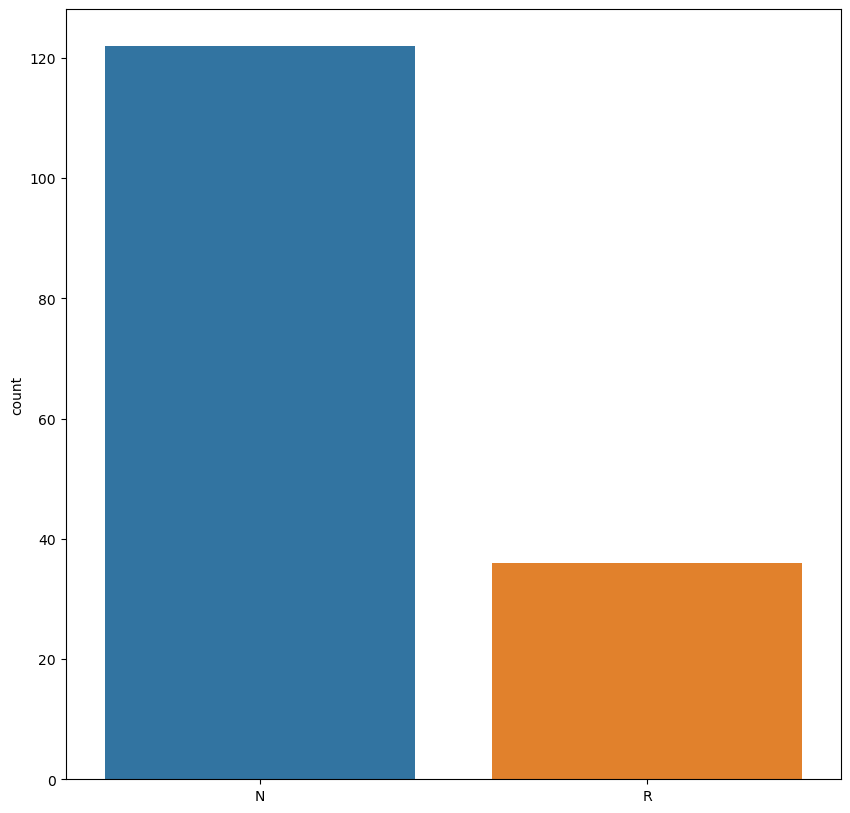

In [33]:
sns.countplot(x=encoder.inverse_transform(train_y))
plt.savefig("beforeOverSampling.png", dpi=300)

In [34]:
upSampler = ADASYN(sampling_strategy=0.5, n_neighbors=10)

In [35]:
train_X, train_y = upSampler.fit_resample(train_X, train_y)

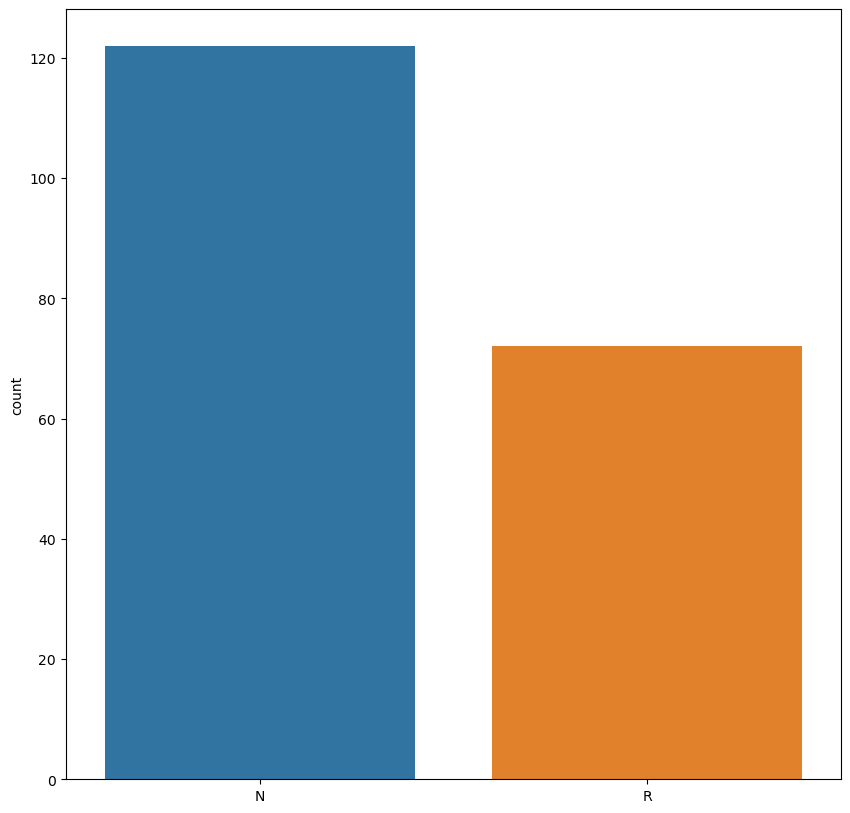

In [36]:
sns.countplot(x=encoder.inverse_transform(train_y))
plt.savefig("afterOverSampling.png", dpi=300)

# F6 score to be used in cross validation

In [37]:
score = make_scorer(fbeta_score, beta=6, average="binary")

# Cross validation

In [38]:
clf = GradientBoostingClassifier(warm_start=True, n_estimators=950)

In [39]:
parameters = {
    "max_features":[3, 4, 5],
    "learning_rate":[0.1, .2, .3, .4, .5, .6, .7, .8, .9, 1],
    "subsample" : [.4, .5, .6, .7, .8, 1],
}

In [40]:
cv = GridSearchCV(clf,parameters,cv=10, scoring=score, n_jobs=-1)

# Sample weights to be given to the fit method

In [41]:
weight = np.zeros_like(train_y, dtype=float)

In [42]:
weight[train_y == 0] = 1
weight[train_y == 1] = 2

In [43]:
cv.fit(train_X, train_y, sample_weight=weight)

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(n_estimators=950,
                                                  warm_start=True),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1],
                         'max_features': [3, 4, 5],
                         'subsample': [0.4, 0.5, 0.6, 0.7, 0.8, 1]},
             scoring=make_scorer(fbeta_score, beta=6, average=binary))

In [44]:
cv.best_score_

0.71

In [45]:
cv.best_params_

{'learning_rate': 0.80, 'max_features': 4, 'subsample': 1}

In [46]:
cv.score(train_X, train_y)

1.00

In [47]:
cv.score(test_X, test_y)

0.55

In [48]:
precision_recall_fscore_support(test_y, cv.predict(test_X), beta=2, average="binary")

(0.55, 0.55, 0.55, None)

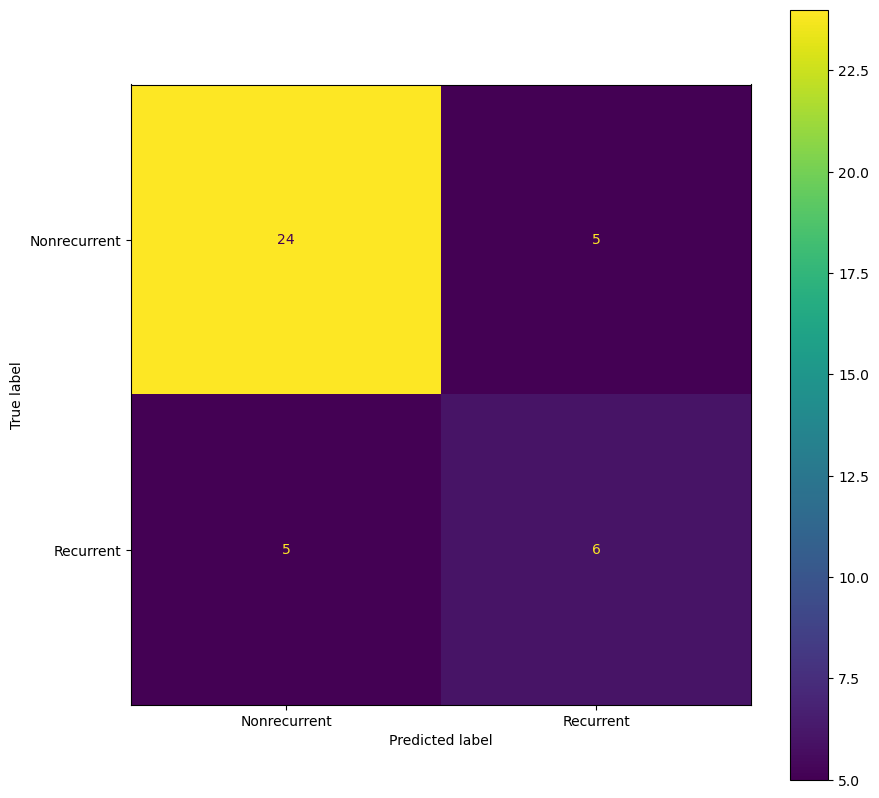

In [49]:
ConfusionMatrixDisplay.from_predictions(test_y, cv.predict(test_X), display_labels=["Nonrecurrent", "Recurrent"])
plt.savefig("confusionMatrix.png", dpi=300)

In [50]:
featureImportances = cv.best_estimator_.feature_importances_
sortation = np.argsort(featureImportances)[::-1]

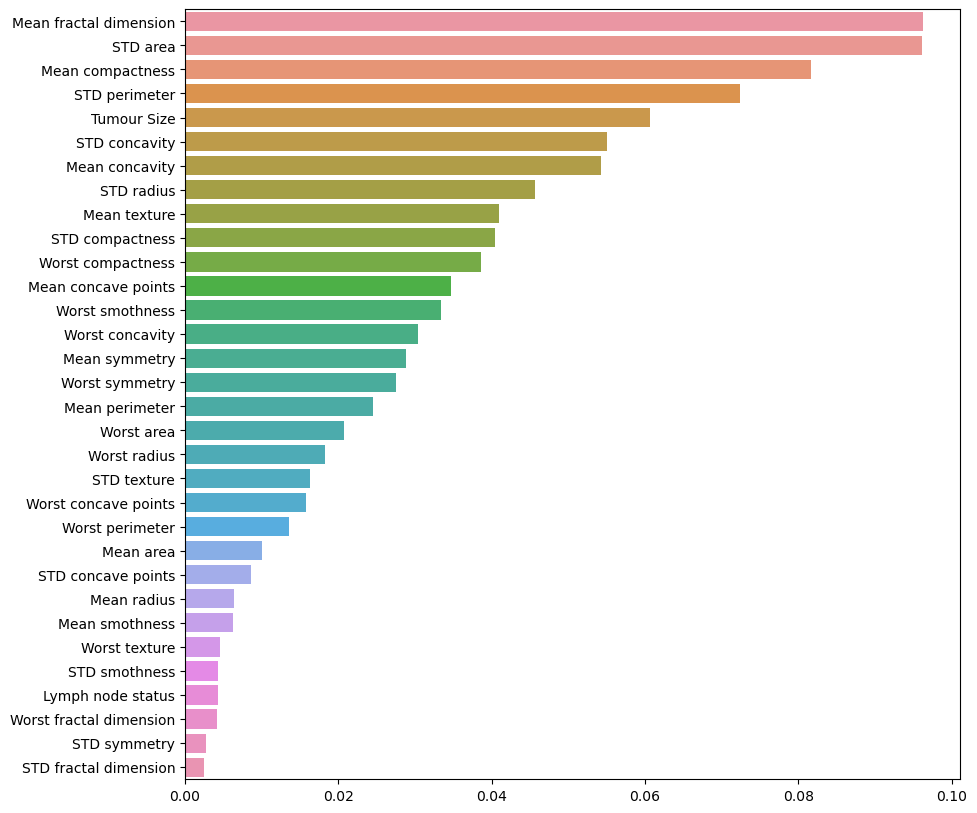

In [51]:
sns.barplot(x=featureImportances[sortation], y=wisconsinRecurrence.columns.to_numpy()[sortation], orient="horizontal")
plt.savefig("importances.png", dpi=300)

# F8 score to be used in cross validation

In [52]:
score = make_scorer(fbeta_score, beta=8, average="binary")

# Cross validation

In [53]:
clf = GradientBoostingClassifier(warm_start=True, n_estimators=950)

In [54]:
parameters = {
    "max_features":[3, 4, 5],
    "learning_rate":[0.1, .2, .3, .4, .5, .6, .7, .8, .9, 1],
    "subsample" : [.4, .5, .6, .7, .8, 1],
}

In [55]:
cv = GridSearchCV(clf,parameters,cv=10, n_jobs=-1)

# Sample weights to be given to the fit method

In [56]:
weight = np.zeros_like(train_y, dtype=float)

In [57]:
weight[train_y == 0] = 1
weight[train_y == 1] = 2

In [58]:
cv.fit(train_X, train_y, sample_weight=weight)

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(n_estimators=950,
                                                  warm_start=True),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1],
                         'max_features': [3, 4, 5],
                         'subsample': [0.4, 0.5, 0.6, 0.7, 0.8, 1]})

In [59]:
cv.best_score_

0.77

In [60]:
cv.best_params_

{'learning_rate': 0.60, 'max_features': 3, 'subsample': 0.70}

In [61]:
cv.score(train_X, train_y)

1.00

In [62]:
cv.score(test_X, test_y)

0.75

In [63]:
precision_recall_fscore_support(test_y, cv.predict(test_X), beta=8, average="binary")

(0.57, 0.36, 0.37, None)

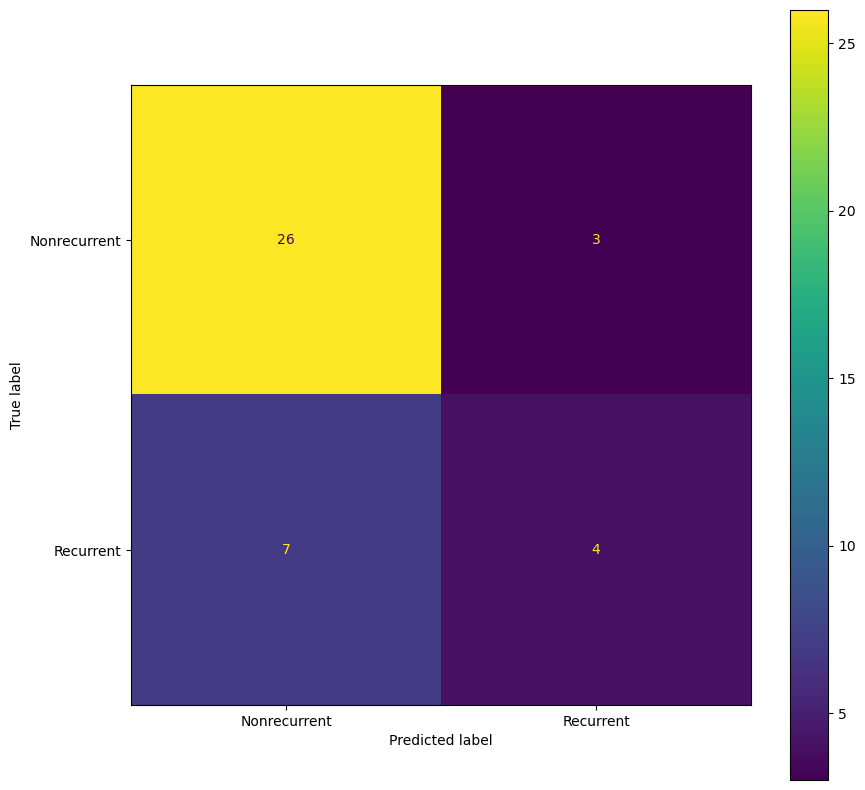

In [64]:
ConfusionMatrixDisplay.from_predictions(test_y, cv.predict(test_X), display_labels=["Nonrecurrent", "Recurrent"])
plt.savefig("confusionMatrix2.png", dpi=300)

In [65]:
featureImportances = cv.best_estimator_.feature_importances_
sortation = np.argsort(featureImportances)[::-1]

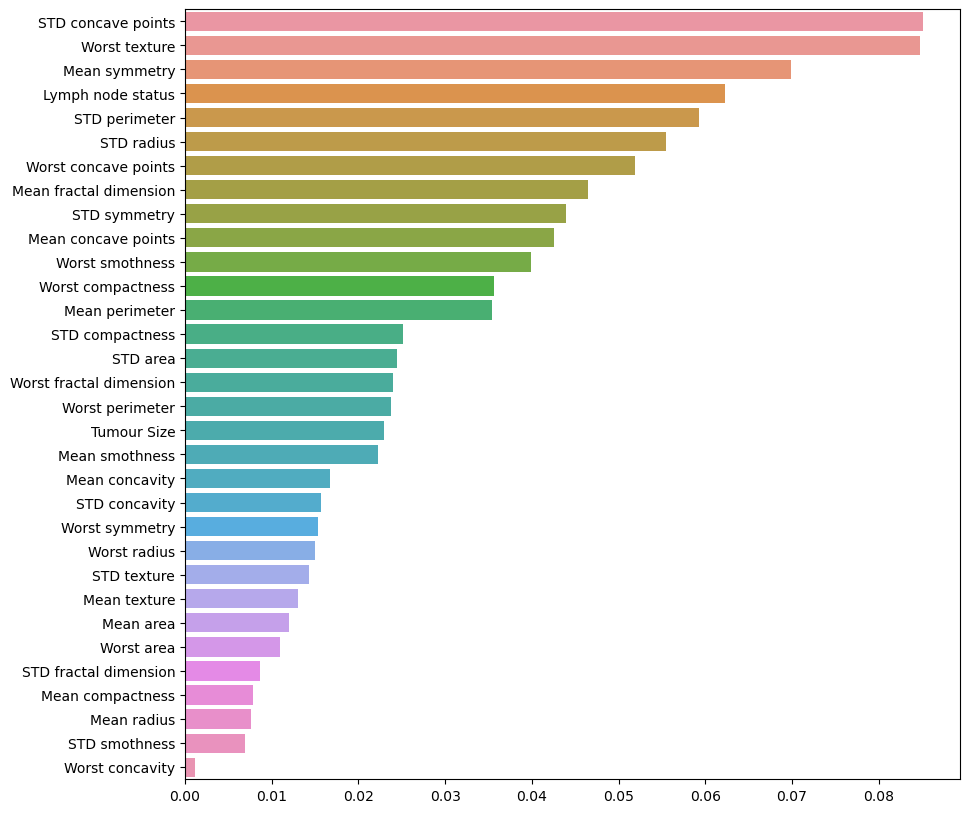

In [66]:
sns.barplot(x=featureImportances[sortation], y=wisconsinRecurrence.columns.to_numpy()[sortation], orient="horizontal")
plt.savefig("importances2.png", dpi=300)

# Regression on time

In [67]:
train_X, test_X, train_y, test_y = train_test_split(wisconsinRecurrence, time, train_size=.8)

In [68]:
clf = GradientBoostingRegressor(n_estimators=450, loss="huber", warm_start=True, max_depth=None)

In [69]:
clf.fit(train_X, train_y)

GradientBoostingRegressor(loss='huber', max_depth=None, n_estimators=450,
                          warm_start=True)

In [70]:
clf.score(test_X, test_y)

-0.39

In [71]:
parameters = {
    "max_features":[2, 3, 5],
    "learning_rate":[0.1, 0.5, 1, 1.5],
    "subsample" : [.4, .5, .8, 1],
}

In [72]:
cv = GridSearchCV(clf, parameters,cv=10, n_jobs=-1)

In [ ]:
cv.fit(train_X, train_y)

In [ ]:
cv.best_score_

In [ ]:
cv.score(test_X, test_y)